- Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.


Early Signs of Diabetes:-

- Hunger and fatigue. Your body converts the food you eat into glucose that your cells use for energy.
- Peeing more often and being thirstier.
- Dry mouth and itchy skin.
- Blurred vision.

In [1]:
#Importing The Packeges:-

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the DataSet:-

df = pd.read_csv("diabeties.csv")
df.head()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Pregnant - Number of times pregnant.
- Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- BloodPressure - Diastolic blood pressure (mm Hg)
- Skin - Triceps skin fold thickness (mm)
- Insulin - 2-Hour serum insulin (mu U/ml)
- BMI - Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction - Diabetes pedigree function
- Age - Age (years)
- Result:-

- Target - Class variable (0 or 1)

# Some Basic Exploration.

In [3]:
#TO check the shape of the DataSet:-

df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glocose    768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Check basic statistics for each columns:-

df.describe()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


-  When i examine Min Max values in this columns they look normal and dont feel like we need to check outliers detection.

In [6]:
#Finding null values columns:-

df.isnull().sum()

pregnant     0
glocose      0
bp           0
skin         0
insulin      0
bmi          0
predigree    0
age          0
target       0
dtype: int64

In [7]:
# To check there is imblance in DataSet:-

df.target.value_counts()

0    500
1    268
Name: target, dtype: int64

- There are 500 samples which says NO Diabeties And 268 Says Yes the person is Diabetic.

<AxesSubplot:xlabel='target', ylabel='count'>

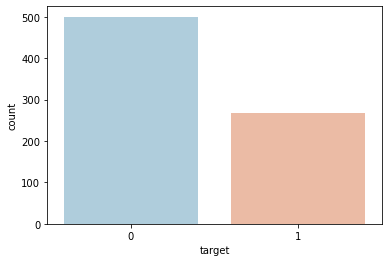

In [8]:
#EDA:-

sns.countplot(x="target", data=df, palette='RdBu_r')

In [9]:
#Checking Average Ratio:-

268/500

0.536

- 0.53, So it looks like some imbalance but it is not a major imblance.

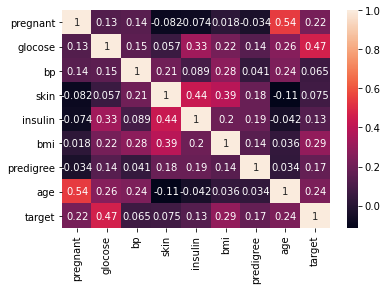

In [10]:
# To check the correlation with the help of Heatmap:-

sns.heatmap(df.corr(), annot =True)
plt.show()

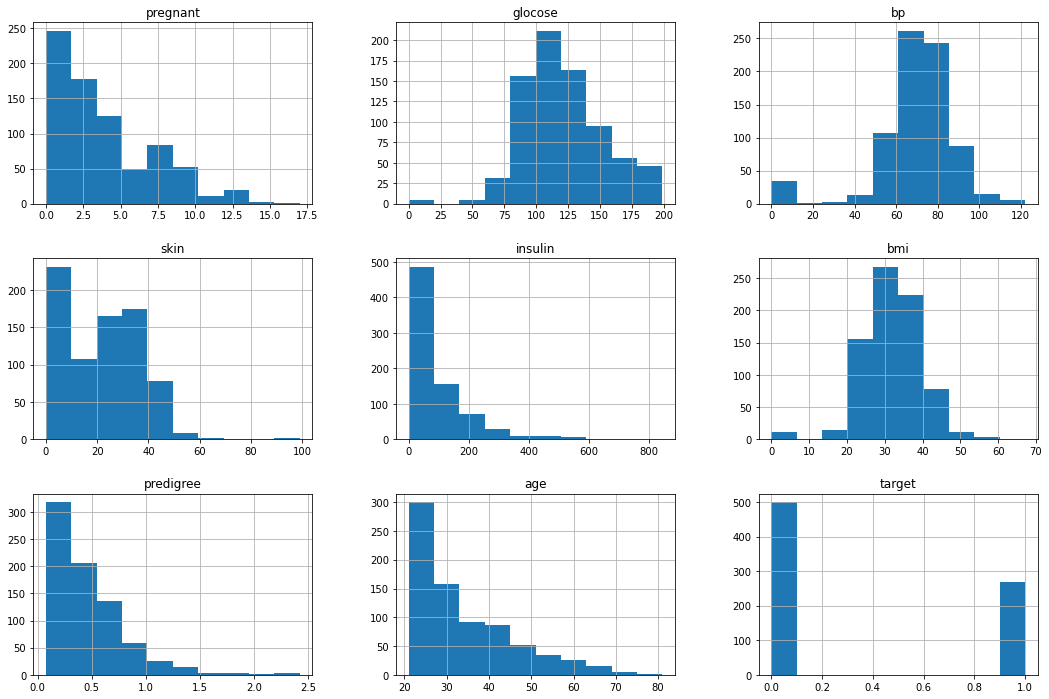

In [11]:
# To check distribution of data and identify outliers:-

df.hist(figsize=(18,12))
plt.show()

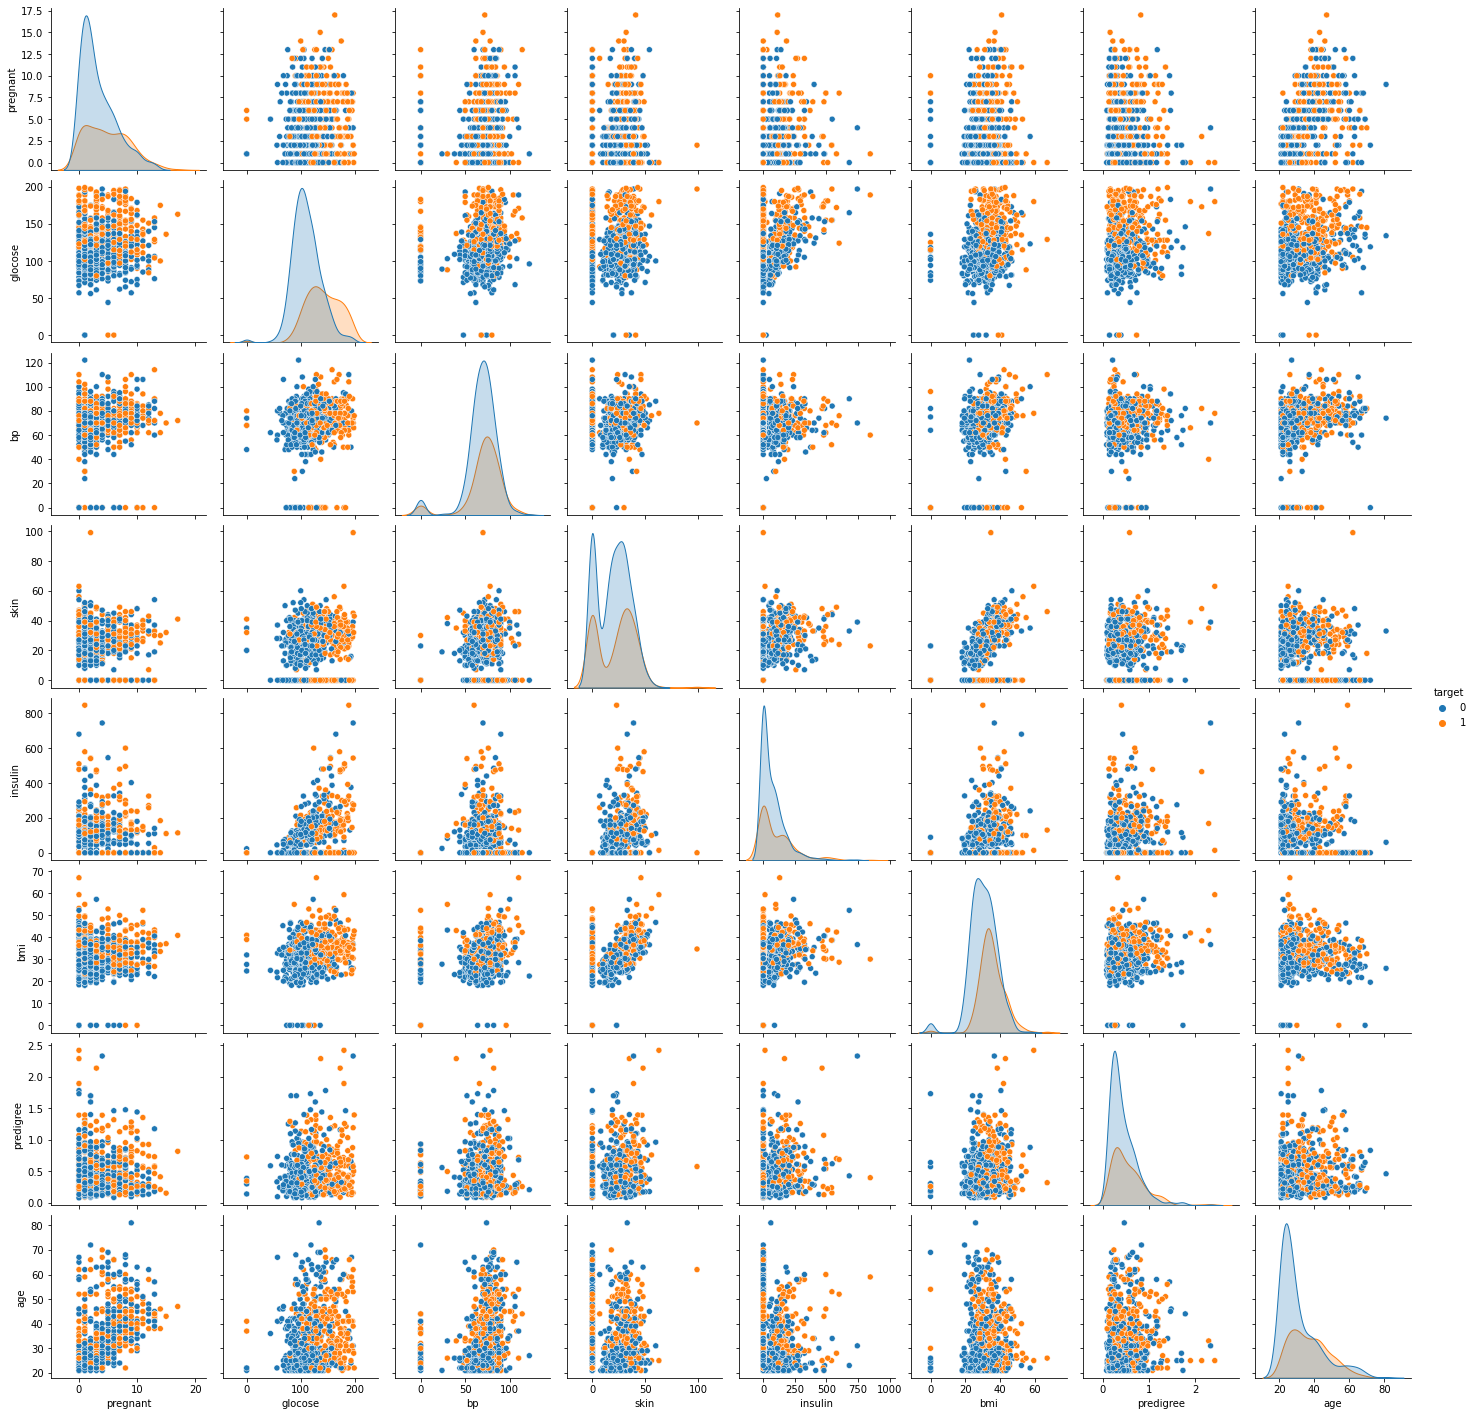

In [12]:
sns.pairplot(df,hue='target')
plt.show()

-  After analysing the pairplot what we will get is the points are overlapping to eachother, That means this is a NON-LINEAR DataSet.

# Separation Of X And Y.

In [13]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

- Once you have X And Y you will do train test split.

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

- Importing all the necessary models:-

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.svm import SVC
svc = SVC()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

- Here i am using all the models to check the Accuracy and find which model provide us best accuracy for this kind of DataSet.

-  Importing Evaluation Metrics:-

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [17]:
# Defining a Function:-

def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(f"Accuracy :- {accuracy_score(ytest,ypred)}")
    print(classification_report(ytest,ypred))
    print(confusion_matrix(ytest,ypred))
    return model

In [18]:
mymodel(logreg)

Accuracy :- 0.7760416666666666
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192

[[109  14]
 [ 29  40]]


LogisticRegression()

In [19]:
mymodel(knn)

Accuracy :- 0.7447916666666666
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       123
           1       0.67      0.58      0.62        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192

[[103  20]
 [ 29  40]]


KNeighborsClassifier()

In [20]:
mymodel(svc)

Accuracy :- 0.7708333333333334
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       123
           1       0.78      0.51      0.61        69

    accuracy                           0.77       192
   macro avg       0.77      0.71      0.73       192
weighted avg       0.77      0.77      0.76       192

[[113  10]
 [ 34  35]]


SVC()

In [21]:
mymodel(dtc)

Accuracy :- 0.7083333333333334
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       123
           1       0.60      0.55      0.58        69

    accuracy                           0.71       192
   macro avg       0.68      0.67      0.68       192
weighted avg       0.70      0.71      0.71       192

[[98 25]
 [31 38]]


DecisionTreeClassifier()

In [22]:
mymodel(rfc)

Accuracy :- 0.7864583333333334
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       123
           1       0.74      0.62      0.68        69

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192

[[108  15]
 [ 26  43]]


RandomForestClassifier()

- After analysing all the default models, We wiil tell that the best model for Diabeties DataSet is Random Forest Classifier And Logistic Regression, Because they give us best accuracy among all the default models. 

. BEST SCORES 
-  RANDOM FOREST CLASSIFIER HAVE 79% OF ACCURACY.
-  LOGISTIC REGRESSION HAVE 78% OF ACCURACY.
-  SUPPORT VECTOR CLASSIFIER HAVE 77% OF ACCURACY.
-  K-NEAREST NEIGHBORS HAVE 74% OF ACCURACY.
-  DECISION TREE CLASSIFIER HAVE 71